In [ ]:
!pip install nixtlats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 2.0 MB/s eta 0:00:00


In [ ]:
from nixtlats import TimeGPT
import os

# Read historic electricity demand data
df = pd.read_csv('/content/24_batteries.csv')
# print(df)
# df=df[df['name']=='Battery_1']
df=df.dropna()
df=df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
os.environ['TIMEGPT_TOKEN'] = "nixtla-tok-6WqeYG5KSxqidgBZ5Ht4IgVm4eRPYkqx2cnr0f5GQifNPBMfry8oCMwyQPfzuCc0NZZ8vGSD9nW4E7uz"
timegpt = TimeGPT(token=os.environ['TIMEGPT_TOKEN'])
# Encode the 'name' column starting from 1
label_encoder = LabelEncoder()
df['name'] = label_encoder.fit_transform(df['name']) + 1
df['bnkId'] = label_encoder.fit_transform(df['bnkId']) + 1
print(len(df))
# Set "Date" column as index
# Assuming your DataFrame df has a column 'timestamp' which contains datetime information
df['time'] = pd.to_datetime(df['time'])


df.set_index('time', inplace=True)

# Resample data into Weekly frequency. Although this is not required. Keeping it so that one can change into 'MS' if needed.
df_resampled = df.resample('12H').mean()

df_resampled.reset_index(inplace=True)

# df_resampled = df_resampled[["time","voltage"]]

# df_resampled['voltage'] = df_resampled['voltage'].fillna(df_resampled['voltage'].mean())
# # or
# df_resampled.isnull().sum()
df_resampled = df_resampled[["time","current"]]

df_resampled['current'] = df_resampled['current'].fillna(df_resampled['current'].mean())
# or
df_resampled.isnull().sum()

/usr/local/lib/python3.10/dist-packages/nixtlats/nixtla_client.py:53: FutureWarning: `'token'` is deprecated; use `'api_key'` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/nixtlats/nixtla_client.py:1605: FutureWarning: Class `TimeGPT` is deprecated; use `NixtlaClient` instead.
  warnings.warn(


58128


time       0
current    0
dtype: int64

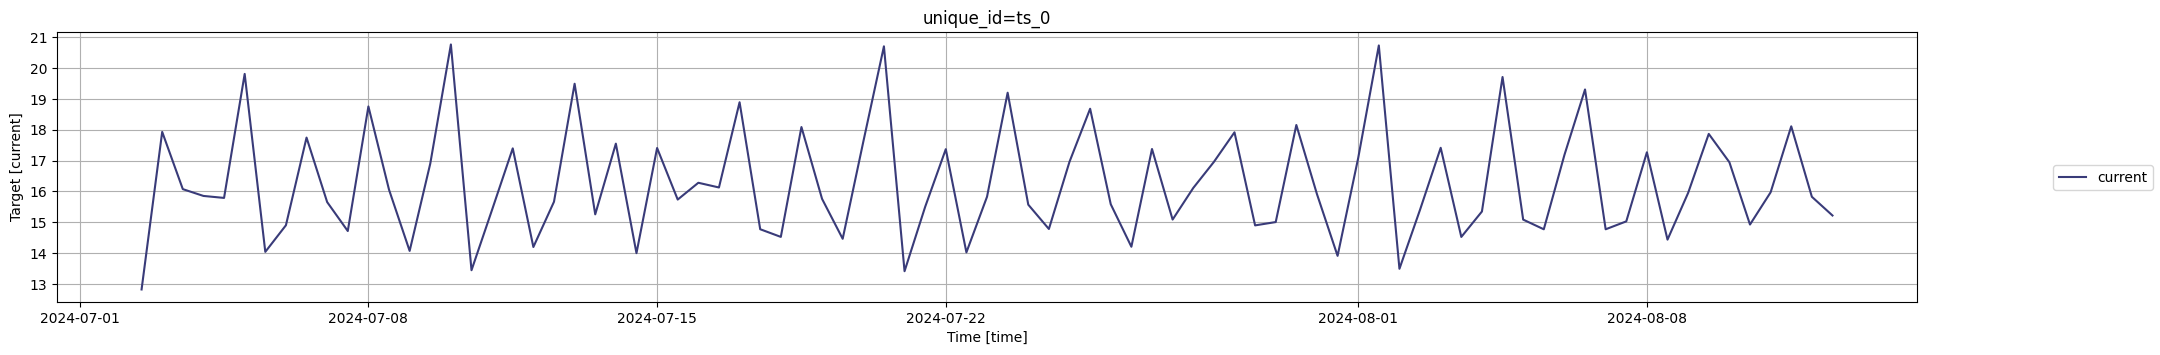

In [ ]:
# timegpt.plot(df_resampled, time_col='time', target_col='voltage')
timegpt.plot(df_resampled, time_col='time', target_col='current')

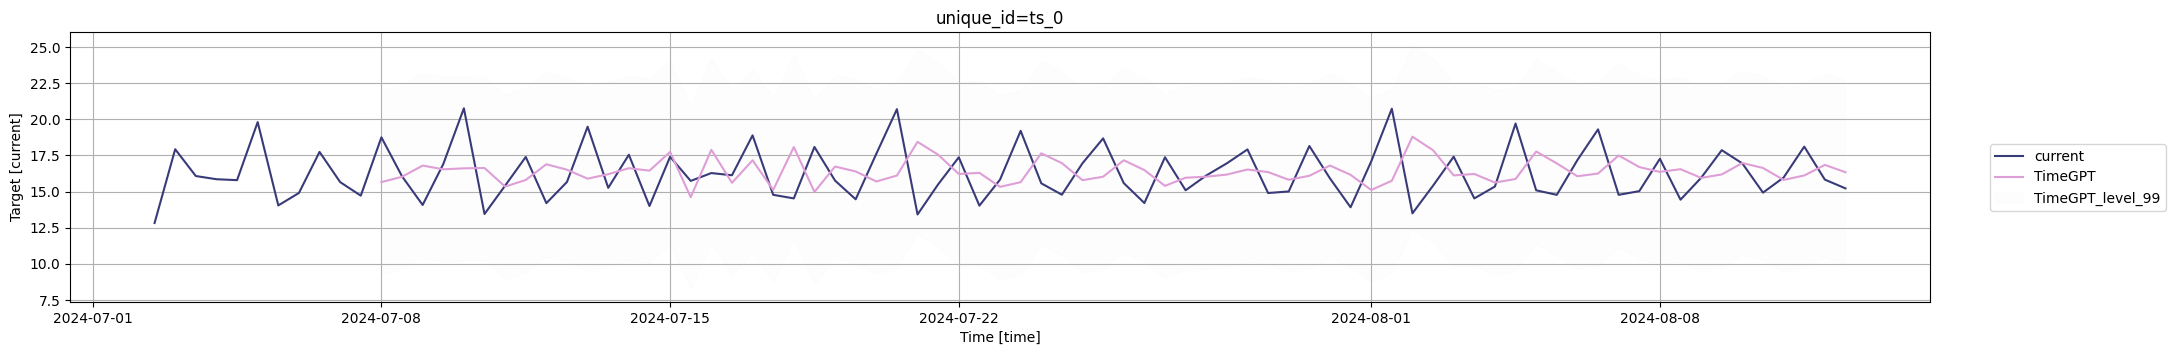

In [ ]:
# # Detect anomalies with a 1-minute frequency
# anomalies_df = timegpt.detect_anomalies(df_resampled, time_col='time', target_col='voltage', freq='1H')

# # Plot the results (optional)
# timegpt.plot(df_resampled, anomalies_df, time_col='time', target_col='voltage')
# Detect anomalies with a 1-minute frequency
anomalies_df = timegpt.detect_anomalies(df_resampled, time_col='time', target_col='current', freq='1H')

# Plot the results (optional)
timegpt.plot(df_resampled, anomalies_df, time_col='time', target_col='current')


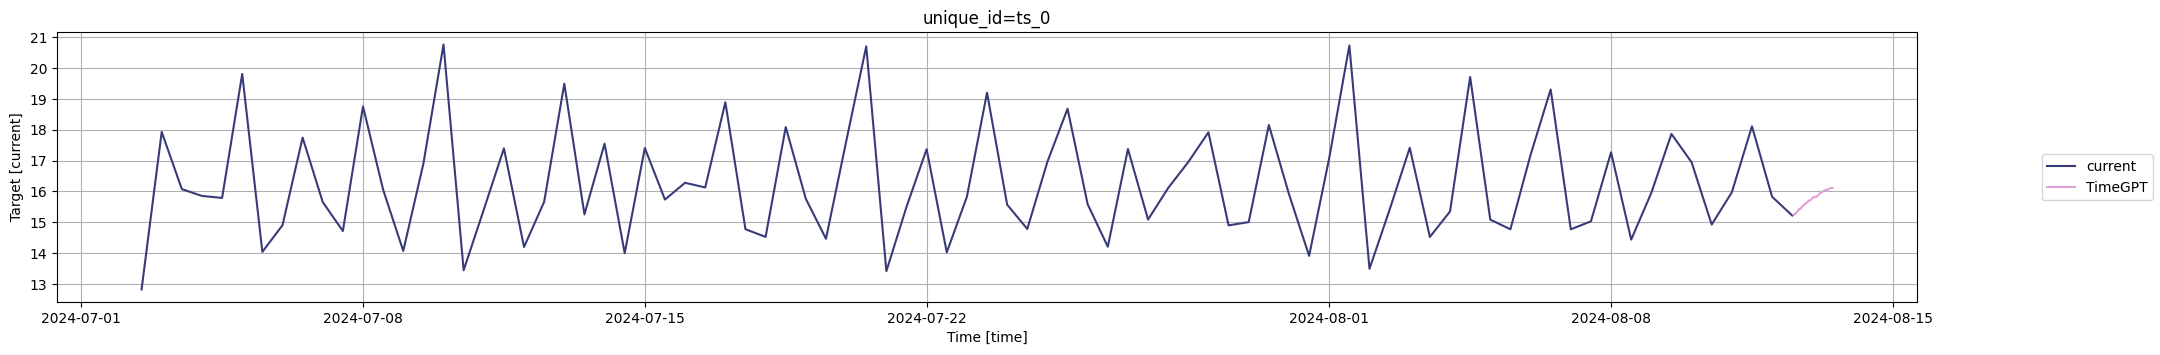

In [ ]:
# timegpt_fcst = timegpt.forecast(df_resampled, h=48, time_col='time', target_col='voltage', freq='1H')
# timegpt.plot(df_resampled, timegpt_fcst, time_col='time', target_col='voltage')
timegpt_fcst = timegpt.forecast(df_resampled, h=24, time_col='time', target_col='current', freq='1H')
timegpt.plot(df_resampled, timegpt_fcst, time_col='time', target_col='current')

In [ ]:
pip install adtk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from adtk.data import validate_series
df=pd.read_csv('/content/updated_final - updated_final.csv')
df=df.dropna()
# df=df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
df['time'] = pd.to_datetime(df['time'])

label_encoder = LabelEncoder()
df['name'] = label_encoder.fit_transform(df['name']) + 1
df['bnkId'] = label_encoder.fit_transform(df['bnkId']) + 1
df

,bnkId,name,time,voltage,current,battery_status1
0,1,1,2024-07-01 04:41:32,1.94,2.8,-1
1,1,1,2024-07-01 04:41:37,1.94,2.8,-1
2,1,1,2024-07-01 04:41:42,1.94,2.8,-1
3,1,1,2024-07-01 04:41:47,1.94,2.8,-1
4,1,1,2024-07-01 04:41:52,1.94,6.3,-1
...,...,...,...,...,...,...
59323,1,17,2024-07-04 14:40:07,2.17,26.6,1
59324,1,17,2024-07-04 14:40:12,2.16,27.3,1
59325,1,17,2024-07-04 14:40:17,2.22,39.9,1
59326,1,17,2024-07-04 14:40:22,2.20,33.6,1


In [ ]:
from sklearn.model_selection import train_test_split
features = df[['time','voltage','current', 'battery_status1']]
features_scaled=features
X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((47462, 4), (11866, 4))

In [ ]:
# Assuming your DataFrame X_train has a column 'timestamp' which contains datetime information
X_train['time'] = pd.to_datetime(X_train['time'])

# Set the 'timestamp' column as the index
X_train.set_index('time', inplace=True)
X_train = validate_series(X_train)
X_train

,voltage,current,battery_status1
time,,,
2024-07-01 04:41:32,1.94,2.8,-1
2024-07-01 04:41:37,1.94,2.8,-1
2024-07-01 04:41:42,1.94,2.8,-1
2024-07-01 04:41:47,1.94,2.8,-1
2024-07-01 04:41:57,1.94,2.8,-1
...,...,...,...
2024-07-04 14:40:07,2.17,26.6,1
2024-07-04 14:40:12,2.16,27.3,1
2024-07-04 14:40:17,2.22,39.9,1


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

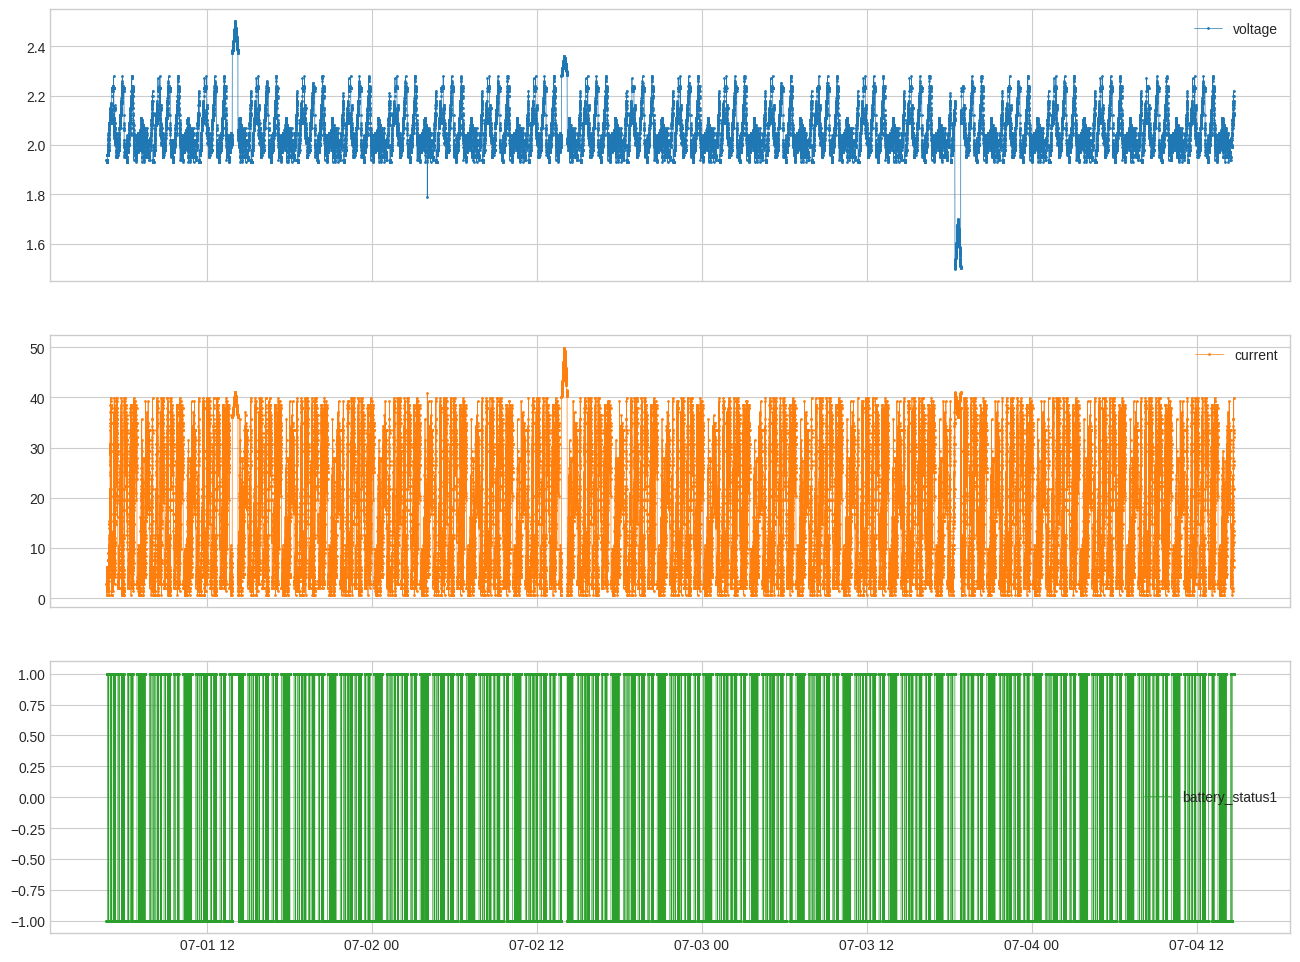

In [ ]:
from adtk.visualization import plot
plot(X_train)